In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import matplotlib.pyplot as plt 



In [2]:
#Creating Dataset and including the first row by setting no header as input
dataset = pd.read_csv('Email_Promotion_final_try2.csv')
#Renaming the columns
#dataset.columns = ['CustomerID','Plan Renew Status', 'Region','Age','Promotion Type','Channel']
print('Shape of the dataset: ' + str(dataset.shape))
print(dataset.head())
dataset.drop(columns=['offer_received'])

Shape of the dataset: (14808, 9)
   age  income  Gender  MaritalStatus  HaveKids  isVeg  IsStudent  \
0   42       0       1              0         0      1          0   
1   41       1       1              0         0      1          1   
2   42       0       1              1         0      1          0   
3   39       0       0              1         0      0          0   
4   43       0       1              1         0      1          0   

   offer_received  offer_completed  
0               0                0  
1               0                0  
2               1                0  
3               0                0  
4               0                0  


,age,income,Gender,MaritalStatus,HaveKids,isVeg,IsStudent,offer_completed
0,42,0,1,0,0,1,0,0
1,41,1,1,0,0,1,1,0
2,42,0,1,1,0,1,0,0
3,39,0,0,1,0,0,0,0
4,43,0,1,1,0,1,0,0
5,44,1,1,1,1,0,0,0
6,50,0,1,0,0,1,0,0
7,29,0,0,1,0,0,0,0
8,44,1,1,0,1,1,0,1
9,27,0,1,0,0,1,0,1


In [3]:
#Creating the dependent variable class
#factor = pd.factorize(dataset['Offer'])
#dataset.Offer = factor[0]
#definitions = factor[1]
#print(dataset.Offer.head())
#print(definitions)
#########################


In [4]:
dataset.describe()

,age,income,Gender,MaritalStatus,HaveKids,isVeg,IsStudent,offer_received,offer_completed
count,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000
mean,37.540046,0.372231,0.500135,0.410454,0.284981,0.535049,0.210089,0.580835,0.282145
std,9.272702,0.483416,0.500017,0.491933,0.451421,0.498787,0.441286,0.493439,0.450059
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [5]:
X = pd.DataFrame(dataset, columns = ["age", "income", 
                                    "Gender",
                                   "MaritalStatus", "HaveKids", 
                                   "isVeg", 
                                   "IsStudent"])
y = pd.DataFrame(dataset, columns = ["offer_completed"])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [7]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import pydot 
import graphviz

import os
# you may have to modify the line below for the MAC. Essentially find the path for the `dot` executable, and add it 
# to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.40.1'

In [9]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(dataset['offer_completed'])

# Remove the labels from the features, so we have one table for independent variables to predict
# (axis 1 refers to columns)
dataset = dataset.drop('offer_completed', axis = 1)

# Saving feature names for later use
feature_list = list(dataset.columns)

# Convert to numpy array
dataset = np.array(dataset)

In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(dataset, labels, test_size = 0.25,
                                                                           random_state = 42)

In [11]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (11106, 8)
Training Labels Shape: (11106,)
Testing Features Shape: (3702, 8)
Testing Labels Shape: (3702,)


In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [13]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.46
Variable: MaritalStatus        Importance: 0.17
Variable: IsStudent            Importance: 0.16
Variable: income               Importance: 0.07
Variable: Gender               Importance: 0.06
Variable: HaveKids             Importance: 0.03
Variable: isVeg                Importance: 0.03
Variable: offer_received       Importance: 0.01


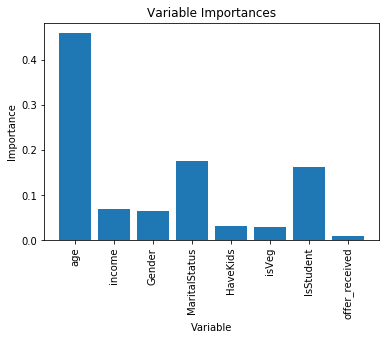

In [14]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [15]:
#Splitting the data into independent and dependent variables


In [16]:
# import sklearn package to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [17]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
model.fit(X_train,y_train)

C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions= model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.92      0.84      3188\n           1       0.62      0.34      0.44      1255\n\n   micro avg       0.75      0.75      0.75      4443\n   macro avg       0.70      0.63      0.64      4443\nweighted avg       0.73      0.75      0.73      4443\n'

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[2922,  266],
       [ 828,  427]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

75.37699752419536

In [23]:
import pickle
save_classifier = open("classifier_subway.pkl","wb")
pickle.dump(model, save_classifier)
save_classifier.close()

In [24]:
classifier_f = open("classifier_subway.pkl", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

In [25]:
model.predict([[20,0,0,1,0,1 ,1]])


array([1], dtype=int64)